In [3]:
scovile = [1,2,3,9,10,12]
k = 7

scovile.sort()

In [6]:
scovile.append(scovile[0]+scovile[1]*2)

In [7]:
scovile

[1, 2, 3, 5, 9, 10, 12, 5]

In [34]:
scovile = [1,2,3,9,10,12]
k = 7

answer = 0
scovile.sort()

if sum(scovile)==0:
    print(-1)

while scovile[0] <k:
    scovile.sort()
    scovile=[scovile[0]+scovile[1]*2] + scovile
    scovile.pop(1)
    scovile.pop(1)
    answer +=1
    
print(answer)

2


In [31]:
from sklearn.linear_model import LinearRegression

ex = LinearRegression()


X=[[1],[2],[3]]
y=[[1],[2],[4]]

ex.fit(X=X,y=y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
ex.coef_

array([[1.5]])

In [33]:
ex.intercept_

array([-0.66666667])

In [42]:
def solution(scoville, K):
    answer = 0
    scoville.sort()

    while scoville[0] <K:
        scoville.append(scoville[0]+scoville[1]*2)
        scoville = scoville[2:]
        scoville.sort()
        answer +=1
        print(scoville)
        if (len(scoville)==1)& (scoville[0] <K):
            return -1
            
    
    return answer


In [43]:
solution([1,1,1,1],10)

[1, 1, 3]
[3, 3]
[9]


-1

In [48]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns

sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

%precision 3

%matplotlib inline

In [54]:
test_result = pd.read_csv("C:/Users/user/sample/6-3-1-logistic-regression.csv")
print(test_result.head(3))

   hours  result
0      0       0
1      0       0
2      0       0


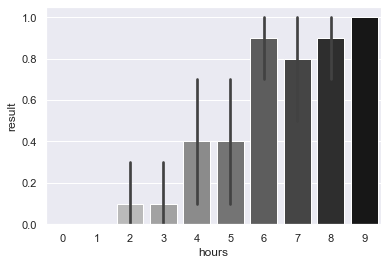

In [55]:
sns.barplot(x="hours",y="result",data = test_result, palette = 'gray_r')

In [56]:
print(test_result.groupby("hours").mean())

       result
hours        
0         0.0
1         0.0
2         0.1
3         0.1
4         0.4
5         0.4
6         0.9
7         0.8
8         0.9
9         1.0


In [57]:
mod_glm = smf.glm(formula = "result~hours", data = test_result, family = sm.families.Binomial()).fit()

In [58]:
mod_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 result   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34.014
Date:                Wed, 17 Jun 2020   Deviance:                       68.028
Time:                        17:58:31   Pearson chi2:                     84.9
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5587      0.901     -5.061      0.000      -6.324      -2.793
hours          0.9289      0.174      5.345      0.000       0.588       1.270
==============================================================================
"""

In [59]:
mod_glm_null = smf.glm("result ~ 1", data = test_result, family=sm.families.Binomial()).fit()

In [61]:
print('Null 모델     :',mod_glm_null.aic.round(3))
print('변수가있는모델:',mod_glm.aic.round(3))

Null 모델     : 139.989
변수가있는모델: 72.028


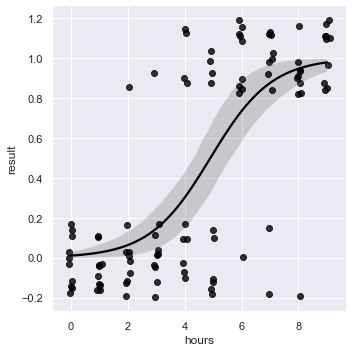

In [62]:
sns.lmplot(x='hours', y='result', data=test_result, logistic=True, scatter_kws = {"color":"black"},line_kws={"color":"black"},x_jitter=0.1,y_jitter=0.2)